In [4]:
# Import dependencies

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [5]:
# Create a set of random latitude and longitude combinations

lats = np.random.uniform(-90, 90, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)

# ^^ Just another way to write the two limits

lat_lngs = zip(lats, lngs)

lat_lngs

In [6]:
# Add the latitudes and longitudes to a list

coordinates = list(lat_lngs)

In [7]:
# Use the print() function to display the latitude and longitude combinations

for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-56.149537819285804 -179.33727887769308
57.918206398853954 -149.87998718628984
-74.00962358690637 -94.03176276418748
88.55952069032597 -136.00511408285155
-5.695665917724966 141.9028144842548
-18.12044479622702 -144.8839118290093
69.14941212833028 -80.56054915527008
11.164984737534851 -41.237980264598264
-10.25553167502082 -130.76462820985208
13.92599925353477 -48.068243070602676
-73.33436272391985 -98.5702342791061
8.228900060651199 -95.38998870639264
-53.12583301327731 81.38893781670777
-53.25180402464922 9.521754815677753
69.54385535416495 102.09532819141924
-56.76297049173265 -46.3841816923111
-26.10624713659265 130.67050158855966
-59.174298315437824 -61.08278274827671
54.00105676883487 -101.05349935309314
-45.235015232621286 -147.2556152140391
-0.04499222810228787 -129.60628264618498
-23.81753385400694 11.917418340200015
-66.92063481843577 -164.27920626321543
-43.643101596241124 -142.31666425406894
-29.455406805459695 82.28864123263327
-24.339996688119 168.2730471588269
21.8381388

7.632848023895605 107.54336627545234
-14.251824752786519 6.250750037977014
-37.15353700590593 155.41832669804057
-42.92840615712629 73.7081944850064
-64.00216817647221 174.71712888022859
3.694032821043436 109.74917720522802
54.55816385512682 147.1012013744995
-29.768413969134265 107.1952319671787
7.342864628399042 -27.318592540425044
-28.975763086968584 82.12086049424397
56.6443020182453 97.77537504117873
77.4092720899439 -60.513636808177466
3.0010553950995273 -134.43662894886577
26.32520631367416 82.93755493020348
-45.20722776408319 15.143409301489982
-67.46049067885073 97.62025356693277
-85.97043524193442 149.492502028263
35.280226178633995 145.38351991785407
-45.998789518300796 -89.26774462343067
-6.29532182082292 -57.50905301105668
79.94627740620402 -113.65009053374692
43.958466102049414 139.61228880661463
-39.52137198548531 49.88845170490188
-65.71330650532714 -177.50689131996788
-52.04828364619161 -135.94946562694454
30.822267214266617 -174.40058918948841
6.031869336064759 54.238

77.48563135451315 -87.06414744745948
75.8046797454596 -57.776289277986535
6.4586213584885 -104.28092528010521
50.77734964560659 4.5683300000670215
76.04019988671712 -146.68594681471006
-15.961773892129074 -72.31138800624456
-85.24283958932773 101.20946024275861
-30.698286188554228 56.55668300137455
51.36458505301036 103.62370617705926
19.760977401871713 -174.48912390429658
49.683120547450756 179.53499633482113
-36.33086600878176 87.4911597320637
-70.3889984453899 67.35062046364749
-72.97881058337444 64.6781869307772
-4.613481942922149 54.140604921545275
37.99169239561134 60.910716719383686
-68.15454253717557 -68.6811796378339
86.6779640784429 122.95668357295818
18.75515148421661 -170.3403240833808
-30.361401982160658 131.56971233041378
67.2875790502288 -119.88547809472979
42.735494266873104 136.09509815312674
-49.94180815494866 109.6221956341277
49.51237619830238 -119.15892964872029
36.62904792150886 -59.5000964213951
-8.203073195643526 91.57542635404502
58.454570454397526 -163.1972421

In [8]:
from citipy import citipy

# Import the requests library

import requests

# Import the API kry

from config import weather_api_key
# from config import weather_api_key

# Import the time library and the datetime module from the datetime library 

import time

from datetime import datetime

# Starting URL for Weather Map API Call.

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [9]:
# Creat a list for holding the cities

cities = []

# Identify the nearest city for each latitude and longitude combination

for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    #If the city is unique, then add it to cities list
    
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count

len(cities)

587

In [10]:
# Create an empty list to hold the weather data.

city_data = []

# Print the beginning of the logging.

print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.

record_count = 1
set_count = 1

# Loop through all the cities in our list

for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes (due to OpenWeatherMap API allowing 60 calls per min for free tier
    if (i % 50 == 0 and i >= 50):
        
        set_count += 1
        
        record_count = 1
        
        time.sleep(60)
        
    # Create endpoint URL with each city
    
    city_url = url + "&q=" + city.replace(" ", "+")
    
    
    # Log the URL, record, and set numbers and the city.
    
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    
    record_count += 1
    
# Run an API request for each of the cities.

    try:
        
        # Parse the JSON and retrieve data.
        
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data.
        
        city_lat = city_weather["coord"]["lat"]
        
        city_lng = city_weather["coord"]["lon"]
        
        city_max_temp = city_weather["main"]["temp_max"]
        
        city_humidity = city_weather["main"]["humidity"]
        
        city_clouds = city_weather["clouds"]["all"]
        
        city_wind = city_weather["wind"]["speed"]
        
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard.
        
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list.
        
        city_data.append({"City": city.title(),
                          
                          "Lat": city_lat,
                          
                          "Lng": city_lng,
                          
                          "Max Temp": city_max_temp,
                          
                          "Humidity": city_humidity,
                          
                          "Cloudiness": city_clouds,
                          
                          "Wind Speed": city_wind,
                          
                          "Country": city_country,
                          
                          "Date": city_date})

# If an error is experienced, skip the city.
    
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.

print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | vaini
Processing Record 2 of Set 1 | homer
Processing Record 3 of Set 1 | punta arenas
Processing Record 4 of Set 1 | tuktoyaktuk
Processing Record 5 of Set 1 | kiunga
Processing Record 6 of Set 1 | tautira
Processing Record 7 of Set 1 | clyde river
Processing Record 8 of Set 1 | cayenne
Processing Record 9 of Set 1 | atuona
Processing Record 10 of Set 1 | sinnamary
Processing Record 11 of Set 1 | champerico
Processing Record 12 of Set 1 | busselton
Processing Record 13 of Set 1 | hermanus
Processing Record 14 of Set 1 | khatanga
Processing Record 15 of Set 1 | mar del plata
Processing Record 16 of Set 1 | yulara
Processing Record 17 of Set 1 | ushuaia
Processing Record 18 of Set 1 | the pas
Processing Record 19 of Set 1 | mataura
Processing Record 20 of Set 1 | walvis bay
Processing Record 21 of Set 1 | avarua
Processing Record 22 of Set 1 | bambous virieux
Processing Record 23 of Set 1 | vao
Pr

Processing Record 39 of Set 4 | tshane
Processing Record 40 of Set 4 | margate
Processing Record 41 of Set 4 | nizhniy odes
Processing Record 42 of Set 4 | ilulissat
Processing Record 43 of Set 4 | frutal
Processing Record 44 of Set 4 | pandan
Processing Record 45 of Set 4 | leningradskiy
Processing Record 46 of Set 4 | nanortalik
Processing Record 47 of Set 4 | pacific grove
Processing Record 48 of Set 4 | tiznit
Processing Record 49 of Set 4 | wulanhaote
City not found. Skipping...
Processing Record 50 of Set 4 | lucapa
Processing Record 1 of Set 5 | sayabec
City not found. Skipping...
Processing Record 2 of Set 5 | ruteng
Processing Record 3 of Set 5 | surt
Processing Record 4 of Set 5 | narsaq
Processing Record 5 of Set 5 | mpigi
Processing Record 6 of Set 5 | cabatuan
Processing Record 7 of Set 5 | rio gallegos
Processing Record 8 of Set 5 | tekeli
Processing Record 9 of Set 5 | manta
Processing Record 10 of Set 5 | beringovskiy
Processing Record 11 of Set 5 | arys
Processing Reco

Processing Record 32 of Set 8 | birao
Processing Record 33 of Set 8 | paredon
Processing Record 34 of Set 8 | zhanaozen
Processing Record 35 of Set 8 | ardabil
Processing Record 36 of Set 8 | matveyevka
Processing Record 37 of Set 8 | komsomolskiy
Processing Record 38 of Set 8 | aksarka
Processing Record 39 of Set 8 | muisne
Processing Record 40 of Set 8 | tahta
Processing Record 41 of Set 8 | sotnikovo
Processing Record 42 of Set 8 | tual
Processing Record 43 of Set 8 | ilebo
Processing Record 44 of Set 8 | inhambane
Processing Record 45 of Set 8 | zvishavane
Processing Record 46 of Set 8 | baykit
Processing Record 47 of Set 8 | port lincoln
Processing Record 48 of Set 8 | puerto penasco
Processing Record 49 of Set 8 | panzhihua
Processing Record 50 of Set 8 | juybar
Processing Record 1 of Set 9 | kotel
Processing Record 2 of Set 9 | amapa
Processing Record 3 of Set 9 | xuddur
Processing Record 4 of Set 9 | cap malheureux
Processing Record 5 of Set 9 | severo-kurilsk
Processing Record

Processing Record 21 of Set 12 | los llanos de aridane
Processing Record 22 of Set 12 | poum
Processing Record 23 of Set 12 | broken hill
Processing Record 24 of Set 12 | anadyr
Processing Record 25 of Set 12 | marzuq
Processing Record 26 of Set 12 | labuan
Processing Record 27 of Set 12 | lodja
Processing Record 28 of Set 12 | acapulco
Processing Record 29 of Set 12 | huldenberg
Processing Record 30 of Set 12 | lluta
Processing Record 31 of Set 12 | saint-joseph
Processing Record 32 of Set 12 | slyudyanka
Processing Record 33 of Set 12 | murgab
Processing Record 34 of Set 12 | flinders
Processing Record 35 of Set 12 | olga
Processing Record 36 of Set 12 | penticton
Processing Record 37 of Set 12 | mauchline
-----------------------------
Data Retrieval Complete      
-----------------------------


In [11]:
len(city_data)

546

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.

city_data_df = pd.DataFrame(city_data)

new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

city_data_df = city_data_df[new_column_order]

city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Vaini,TO,2022-08-31 19:44:00,-21.2000,-175.2000,69.96,83,20,5.75
1,Homer,US,2022-08-31 19:44:00,59.6425,-151.5483,54.81,80,100,5.99
2,Punta Arenas,CL,2022-08-31 19:44:00,-53.1500,-70.9167,44.71,70,100,6.91
3,Tuktoyaktuk,CA,2022-08-31 19:44:01,69.4541,-133.0374,59.00,72,20,8.05
4,Kiunga,PG,2022-08-31 19:44:01,-6.1219,141.2906,72.34,100,99,1.14


In [13]:
# Create the output file(CSV)

output_data_file = "weather_data/cities.csv"

# Export the City_Data into a csv

city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [15]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")
today

'08/31/22'

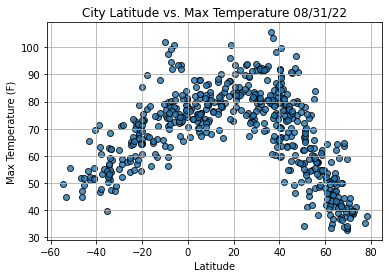

In [16]:
# Build the scatter plot for latitude vs. max temperature.

plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.

plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))

plt.ylabel("Max Temperature (F)")

plt.xlabel("Latitude")

plt.grid(True)

# Save the figure.

plt.savefig("weather_data/Fig1.png")

# Show plot.

plt.show()

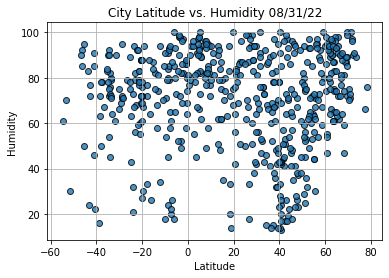

In [17]:
# Build the scatter plot for latitude vs. humidity.

plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.

plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))

plt.ylabel("Humidity")

plt.xlabel("Latitude")

plt.grid(True)

# Save the figure.

plt.savefig("weather_data/Fig2.png")

# Show plot.

plt.show()

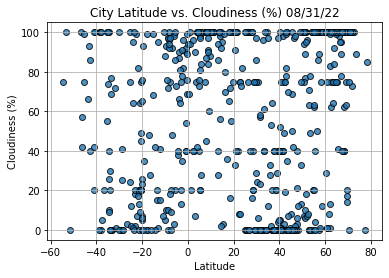

In [18]:
# Build the scatter plot for latitude vs. cloudiness.

plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.

plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))

plt.ylabel("Cloudiness (%)")

plt.xlabel("Latitude")

plt.grid(True)

# Save the figure.

plt.savefig("weather_data/Fig3.png")

# Show plot.

plt.show()

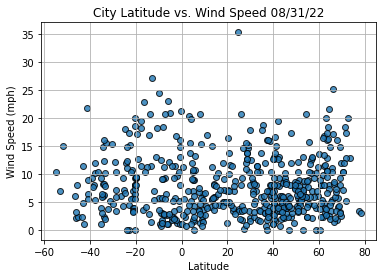

In [19]:
# Build the scatter plot for latitude vs. wind speed.

plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.

plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))

plt.ylabel("Wind Speed (mph)")

plt.xlabel("Latitude")

plt.grid(True)

# Save the figure.

plt.savefig("weather_data/Fig4.png")

# Show plot.

plt.show()

In [20]:
!jupyter nbextension enable --py gmaps

# in case I run into gmap issues

Enabling notebook extension jupyter-gmaps/extension...
      - Validating: OK


In [21]:
# Import linregress

from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.

def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line.
    
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create a scatter plot and plot the regression line.
    
    plt.scatter(x_values,y_values)
    
    plt.plot(x_values,regress_values,"r")
    
    # Annotate the text for the line equation.
    
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    
    plt.title(title)
    
    plt.xlabel('Latitude')
    
    plt.ylabel(y_label)
    
    plt.show()
    

In [22]:
index13 = city_data_df.loc[13]
index13

City                     Khatanga
Country                        RU
Date          2022-08-31 19:44:05
Lat                       71.9667
Lng                         102.5
Max Temp                    38.79
Humidity                       90
Cloudiness                    100
Wind Speed                  17.38
Name: 13, dtype: object

In [23]:
# Create Northern and Southern Hemisphere DataFrames

northern_hemi_df = city_data_df.loc[(city_data_df['Lat'] >= 0)]

southern_hemi_df = city_data_df.loc[(city_data_df['Lat'] < 0)]

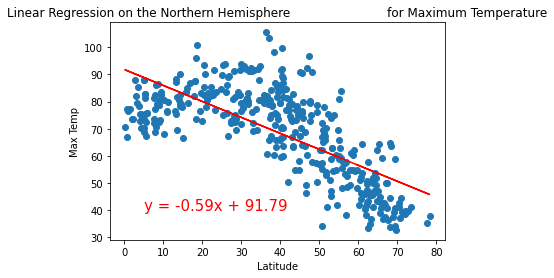

In [24]:
#  Linear regression on the Northern Hemisphere

x_values = northern_hemi_df['Lat']

y_values = northern_hemi_df['Max Temp']




plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp', (5,40))

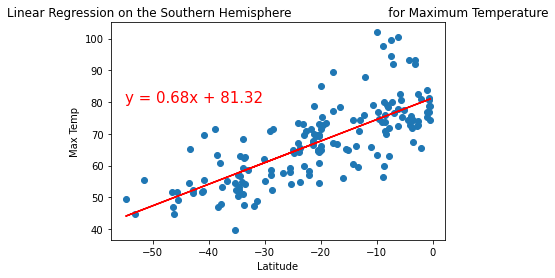

In [25]:
#  Linear regression on the Northern Hemisphere

x_values = southern_hemi_df['Lat']

y_values = southern_hemi_df['Max Temp']

# Call the function

plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp', (-55,80))

# print(f"The r-value is: {r_value:.2f}")

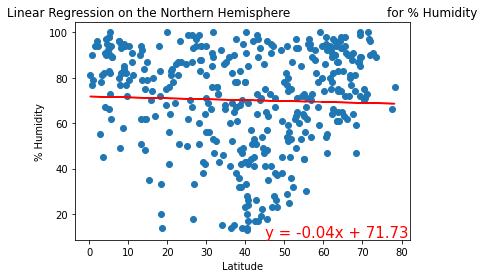

In [26]:
# Linear regression on the Northern Hemisphere

x_values = northern_hemi_df["Lat"]

y_values = northern_hemi_df["Humidity"]

# Call the function.

plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(45,10))

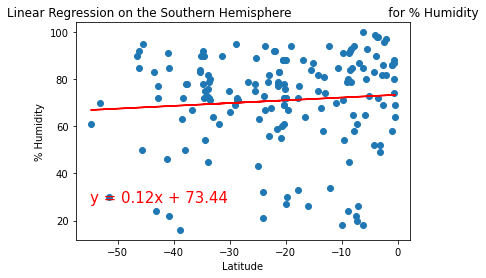

In [27]:
# Linear regression on the Southern Hemisphere

x_values = southern_hemi_df["Lat"]

y_values = southern_hemi_df["Humidity"]

# Call the function.

plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-55,28))

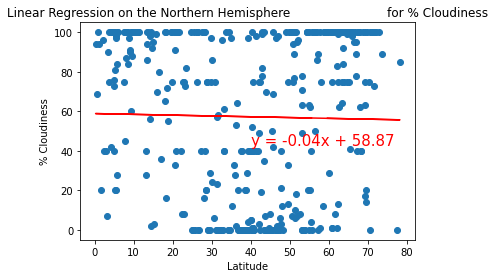

In [28]:
# Linear regression on the Northern Hemisphere

x_values = northern_hemi_df["Lat"]

y_values = northern_hemi_df["Cloudiness"]

# Call the function.

plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,43))

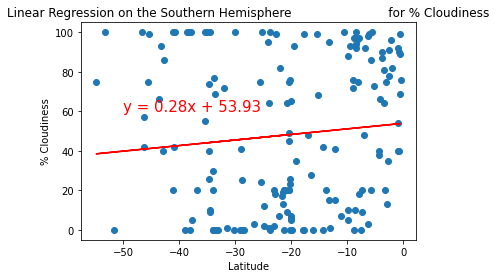

In [29]:
# Linear regression on the Northern Hemisphere

x_values = southern_hemi_df["Lat"]

y_values = southern_hemi_df["Cloudiness"]

# Call the function.

plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

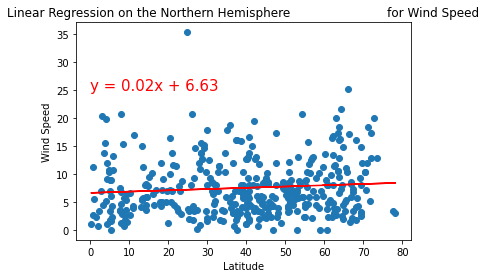

In [30]:
# Linear regression on the Northern Hemisphere

x_values = northern_hemi_df["Lat"]

y_values = northern_hemi_df["Wind Speed"]

# Call the function.

plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(0,25))

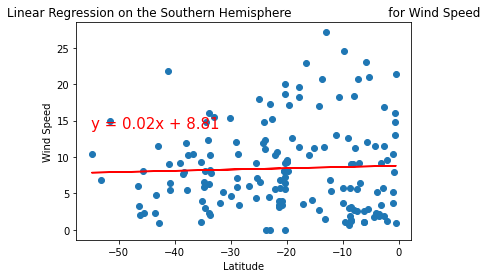

In [31]:
# Linear regression on the Southern Hemisphere

x_values = southern_hemi_df["Lat"]

y_values = southern_hemi_df["Wind Speed"]

# Call the function.

plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-55,14))

In [32]:
# Import dependencies

import pandas as pd
import gmaps
import requests

# Import API key

from config import g_key

In [33]:
# Store the CSV you saved created in part one into a DataFrame.
city_data_df = pd.read_csv("weather_data/cities.csv")
city_data_df.dtypes

City_ID         int64
City           object
Country        object
Date           object
Lat           float64
Lng           float64
Max Temp      float64
Humidity        int64
Cloudiness      int64
Wind Speed    float64
dtype: object

In [34]:
# Configure gmaps to use your Google API key.
gmaps.configure(api_key=g_key)

In [35]:
# Heatmap of temperature

# Get the latitude and longitude.

locations = city_data_df[["Lat", "Lng"]]

# Get the maximum temperature.

max_temp = city_data_df["Max Temp"]

# Assign the figure variable.

fig = gmaps.figure(center=(30.0,31.0), zoom_level=1.5)

# Assign the heatmap variable.

heat_layer = gmaps.heatmap_layer(locations, weights=[max(temp,0) for temp in max_temp], dissipating=False, max_intensity=300, point_radius=4)

# Add the heatmap layer.

fig.add_layer(heat_layer)

# Call the figure to plot the data.

fig

Figure(layout=FigureLayout(height='420px'))

In [36]:
# In the event a max temp was negative for 'heat_layer' use the following:


# # Get the maximum temperature.
# max_temp = city_data_df["Max Temp"]
# temps = []
# for temp in max_temp:
#     temps.append(max(temp, 0))

# using list comprehension the following code could be written for the for loop

# [max(temp, 0) for temp in max_temp]

# the heat_layer code would then look like 
# heat_layer = gmaps.heatmap_layer(locations, weights=[max(temp, 0) for temp in max_temp])

In [37]:
# Heatmap of percent humidity

locations = city_data_df[["Lat", "Lng"]]

humidity = city_data_df["Humidity"]

fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)

heat_layer = gmaps.heatmap_layer(locations, weights=humidity, dissipating=False, max_intensity=300, point_radius=4)

fig.add_layer(heat_layer)

# Call the figure to plot the data.

fig

Figure(layout=FigureLayout(height='420px'))

In [38]:
# Heatmap of percent cloudiness

locations = city_data_df[["Lat", "Lng"]]

clouds = city_data_df["Cloudiness"]

fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)

heat_layer = gmaps.heatmap_layer(locations, weights=clouds, dissipating=False, max_intensity=300, point_radius=4)

fig.add_layer(heat_layer)

# Call the figure to plot the data.

fig

Figure(layout=FigureLayout(height='420px'))

In [39]:
# Heatmap of Wind Speed

locations = city_data_df[["Lat", "Lng"]]

wind = city_data_df["Wind Speed"]

fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)

heat_layer = gmaps.heatmap_layer(locations, weights=wind, dissipating=False, max_intensity=300, point_radius=4)

fig.add_layer(heat_layer)

# Call the figure to plot the data.

fig

Figure(layout=FigureLayout(height='420px'))

In [ ]:
# Ask the customer to add a minimum and maximum temperature

min_temp = float(input("What is the minimum temperature you would like for your trip? "))
max_temp = float(input("What is the maximum temperature you would like for your trip? "))

In [ ]:
# Filter the dataset to find the cities that fit the criteria

preferred_cities_df = city_data_df.loc[(city_data_df["Max Temp"] <= max_temp) & \
                                       (city_data_df["Max Temp"] >= min_temp)]

preferred_cities_df.head()

In [ ]:
preferred_cities_df.count()

In [ ]:
# Create a DataFrame called hotel_df to store hotel names along with city, country, max temp, and coordinates

hotel_df = preferred_cities_df[["City", "Country", "Max Temp", "Lat", "Lng"]].copy()

hotel_df["Hotel Name"] = ""

hotel_df.head(10)

In [ ]:
# Set parameters to search for a hotel

params = {
    
    "radius": 5000,
    "type": "lodging",
    "key": g_key
}